# DATA ANALYSIS USING PYTHON - Final Project

## ZOMATO Dataset Analysis Using API

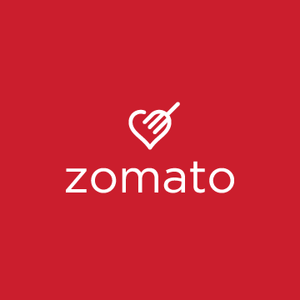

In [21]:
from IPython.display import Image
Image("/Users/sonalichaudhari/Desktop/final/Z.png")

### Zomato is a restaurant search and discovery service founded in 2008 by Deepinder Goyal and Pankaj Chaddah.
### It currently operates in 24 countries, including India, Australia and the United States.
### It provides information and reviews on restaurants, including images of menus where the restaurant does not have its own website.

### * DATASET

Data that has been analyzed is taken from ZOMATO.

There has been 2 types of API request been done on the ZOMATO dataset.

https://developers.zomato.com/documentation#/

Cities API:
1. Cities details: https://developers.zomato.com/api/v2.1/cities?q='+CityName+'&count=20

Search API
2. Restaurants details: https://developers.zomato.com/api/v2.1/search?entity_id='+CityID+'&entity_type=city&start=20


### * DATA COLLECTION PROCESSING AND STORAGE

### DATA COLLECTED

- For 24 Countries
- For 533 Cities
- Around 44000 restaurant json files

#### COLLECTION

-  To get list of all the cities of ZOMATO operates:
Created a CSV of cities and their countries - https://www.zomato.com/qatar

Github link:

-  Passed all the cities from the Cities.csv to CITIES API to get the city id for each city using request.get().
   Created a csv IDS.csv having all city ids.
   - Cities with same name exist in different states or countries with unique ids.
   - Maintained another COUNTRY.csv which has country and its id from data obtained from CITIES API.


-  Passed the city ids from IDS.csv to SEARCH API to get details about restaurants in that city using request.get()
   - For a single request.get() returns only 20 restaurant details and not more.

#### Extra Files

1. Cities.csv
2. IDS.csv
3. COUNTRY.csv

#### OUPTPUT:  COLLECTING_DATA.ipynb file

#### PROCESSING on the Restaurant Data obtained

1. For a single request.get() returns only 20 restaurant details and not more.
2. Each restaurant detail for a single request.get() call is stored as a single object of a list: final=[ ]
3. The restaurant detail doesn't have country name in it but only country id.
    - Appended country name to each restaurant object in final[ ] using COUNTRY.csv matching over country id.

#### STORING

1. Each restaurant object in final[ ] is converted to json.
2. All JSON Files created are stored in a temporary folder named TEMP
3. Folder Structure used:
data -> Country -> City -> RestaurantName_ResId.json
4. With the above structure each JSON file is moved from TEMP folder to the required location

#### OUPTPUT:  STORING_DATA.ipynb file

# ANALYSIS PERFORMED

### * ANALYSIS 1
### TOP 5 Cuisines by NUMBER of RESTAURANTS offering them in every COUNTRY 

#### STEPS:

1. Each restaurant json file have one or multiple cuisines
2. Looping through each restaurant json file
3. Checking for multiple cuisines for each restaurant json file.
4. For every single restaurant and entry per cusine id made in a nested DICT name C={ }
5. The data in Dict C is stored in a ANA_1.csv
6. ANA_1.csv data is coverted in dataframe
7. Dataframe is grouped by Country Name and sorted Restuarants count in descending order
8. The top 5 restaurants details is retrieved grouped by country name.
9. Top 5 restaurants by restuarant number distribution for US is haown in pie charts form.

#### OUTPUT:

1. ANA_1.csv
2. Top 5 restaurants by restuarant number distribution for US is haown in pie charts form

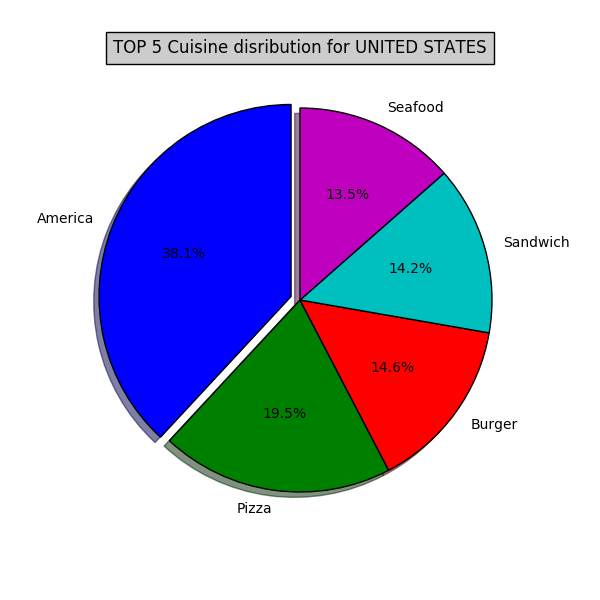

In [14]:
from IPython.display import Image
Image("/Users/sonalichaudhari/Desktop/final/analysis/ana_1/ana_1.png")

### * ANALYSIS 2
### As Per User Input retrieving the Highest Rated Restaurant details

#### STEPS:

1. Taking user input for city name and storing it in a variable.
2. From the data collected and stored of reatuarant json file looping only through the user given city's files.
3. Storing the filtered files in a list named temp[]
4. Converting temp[ ] data into a ANA_2_PART1.csv
5. ANA_2_PART1.csv data is converted into dataframe.
6. Dataframe is grouped by cuisnes and sorted by user ratingin descing order.
7. Creating ANA_2_PART2.csv having sorted data from dataframe.
8. User input for restaurnt id and cusines from above dataframe is taken.
9. The user selected restaurant for a particular cuisine in a particulat city details are obatined.
10. The final user required restaurant detail is stored in ANA_2_PART.csv

#### OUTPUT:

1. ANA_2_PART1.csv
2. ANA_2_PART2.csv
3. ANA_2_PART3.csv

### * ANALYSIS 3
###  Finding the Nearest 10 Restaurants Given a Address

#### REQUIREMENTS:

- LIBRARIES: geopy, geocoders installed

#### STEPS:

1. User input for address is taken with street, city, country name.
2. Using geolocator complete address for user input is obtained
3. The latitude and longitude values for user input address is retrieved and stored in 2 variables.
4. Every Json file is looped in the data and loaded.
5. The latitude and longitude for each JSON file is stored.
6. Distance between the source(user given address) and destination(JSON file) is calculated using 'vincentry()' in miles.
7. vincenty() takes latitude and longitude values for source and destination and returns the distance.
8. The restuarant JSON files are filtered forhaving distance less than 25 miles.
9. The data for filtered restaurant is stored in temp[ ] list.
10. A dict DISTANCE{ } contains the res_id as key and the its distance calculated as value. 
11. DISTANCE{ } is sorted in ascending order and  TOP 10 are stored in S.
12. A list RES_ID contains all the keys(res_id) of S.
13. A list RES[ ] contains data of all restaurants whose res_id is in RES_ID.
14. A ANA_3_PART1.csv(final ouput) giving top 10 nearest restaurant details and their distance is created.
15. ANA_3_PART1.csv is converted to Dataframe.

#### OUTPUT:

1. ANA_3_PART1.csv